In [32]:
class animal:
    def __init__(self,name,size):
        self.name=name
        self.size=size
    def show(self):
        print(f'Name is {self.name} and size is {self.size}')

In [35]:
k=animal('rhino',2)

In [36]:
k.show()

Name is rhino and size is 2


In [325]:
def fib(a=0,b=1):# generator
    while True:
        yield a
        a,b=b,a+b

In [323]:
s=fib()

In [321]:
next(s)

102334155

In [20]:
class stack():
    def __init__(self):
        self.items=[]
    def pop(self):
        return self.items.pop()
    def append(self,m):
        return self.items.append(m)
    def remove(self,m):
        return [i for i in self.items if i!=m]
    def extend(self,m):
        return self.items.extend(m)
    def ret_list(self):
        return self.items

In [21]:
k=stack()

In [13]:
print(k.append([1,2,3]))

None


In [14]:
k.pop()

[1, 2, 3]

In [15]:
k.remove(3)

[]

In [23]:
k.extend([1,2,3])

In [24]:
k.ret_list()

[1, 2, 3]

# hash functions 

In [130]:
# hash function
class get_hashes:
    def __init__(self):
        self.arr=[[] for i in range(10)]
    def get_hash(self,s):
        return sum(list(map(lambda x:ord(x),s)))%10
    def assign(self,value,key):
        hashed=self.get_hash(key)
        self.arr[hashed].append([key,value])
        return self.arr
    def get_values(self,key):
        return self.arr[self.get_hash(key)]
    def __getitem__(self,key):
        h=self.get_hash(key)
        return self.arr[h]
    def __setitem__(self,key,value):
        h=self.get_hash(key)
        self.arr[h].append([key,value])
        return self.arr

In [131]:
k=get_hashes()

In [132]:
k.assign(value=102,key='march_9')

[[], [], [], [], [], [['march_9', 102]], [], [], [], []]

In [133]:
k.get_values('march_9')

[['march_9', 102]]

In [134]:
k['march_9']

[['march_9', 102]]

In [135]:
k['march_10']=100

In [136]:
k['march_10']

[['march_9', 102], ['march_10', 100]]

In [137]:
l=[[],[],[]]
l[0]=1

In [138]:
k['march_18']=10

In [139]:
k.get_hash('march_11')

6

In [141]:
k['march_18']

[['march_18', 10]]

# Binary Tree search

In [17]:
class node:
    def __init__(self,value):
        self.value=value
        self.right=None
        self.left=None
class BinarySearchTree:
    def __init__(self):
        self.root=None
    def insert_value(self,value):
        if self.root==None:
            self.root=node(value)
        else:
            self.insert(value,self.root)
    def insert(self,value,curr_node):
        if value>curr_node.value:
            if curr_node.right is None:
                curr_node.right=node(value)
            else:
                self.insert(value,curr_node.right)
        elif value<curr_node.value:
            if curr_node.left is None:
                curr_node.left=node(value)
            else:
                self.insert(value,curr_node.left)
        else:
            raise 'Value already exist'
    def search_value(self,value,curr_node):
        if curr_node.value==value:
            return True
        elif value<curr_node.value and curr_node.left!=None:
            self.search_value(value,curr_node.left)
        elif value>curr_node.value and curr_node.right!=None:
            self.search_value(value,curr_node.right)
        else:
            return False
    def search(self,value):
        if self.root!=None:
            return self.search_value(value,self.root)
        else:
            return False
    def min_(self,node=None):
        if self.root.value!=None and node == None:
            return self.__find_min(self.root)
        elif self.root.value!=None and node != None:
            return self.__find_min(node)
        else:
            return None
    def max_(self,node=None):
        if self.root.value!=None:
            return self.__find_max(self.root)
        else:
            return None
    def __find_min(self,curr_node):
        if curr_node.left==None:
            return curr_node.value
        else:
            self.__find_min(curr_node.left)
    def __find_max(self,curr_node):
        if curr_node.right==None:
            return (curr_node.value,curr_node)
        else:
            self.__find_max(curr_node.right)
    def delete(self,value):
        if self.root.value!=None:
            return __delete(value,self.root)
    def __delete(self,value,curr_node):
        if value<curr_node.value:
            self.__delete(value,curr_node.left)
        elif value>curr_node.right:
            self.__delete(value,curr_node.right)
        else:
            if curr_node.left==None and curr_node.right==None:
                return None
            elif curr_node.left==None:
                return curr_node.right
            elif curr_node.left==None:
                return curr_node.left
            else:
                value,node=self.max_(curr_node)
                node.value=None
                curr_node.value=value
    global visited,out
    visited={}
    out=[]
    def BinarySearchTraversal(self):
        return self.__BST(self.root)
    def __BST(self,curr_node):
        if curr_node.value not in visited:
            out.append(curr_node.value)
            visited[curr_node.value]=True
            if (curr_node.left==None and curr_node.right==None) or (curr_node.right in visited and curr_node.left in visited):
                return 
            elif curr_node.left==None or curr_node.left in visited:
                self.__BST(curr_node.right)
            else:
                self.__BST(curr_node.left)
        return out

In [18]:
tree=BinarySearchTree()

In [19]:
for i in range(10):
    tree.insert_value(i)

In [20]:
print(tree.BinarySearchTraversal())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
visited

{0: True,
 1: True,
 2: True,
 3: True,
 4: True,
 5: True,
 6: True,
 7: True,
 8: True,
 9: True}

# Graph Theory

In [16]:
routes=[
    ('Mumbai','Paris'),
    ('Mumbai','Dubai'),
    ('Paris','Dubai'),
    ('Paris','Newyork'),
    ('Dubai','Newyork'),
    ('Newyork','Toronto')
]

In [17]:
class Graph:
    def __init__(self,routes):
        self.dict={}
        for i,j in routes:
            if i not in self.dict:
                self.dict[i]=[j]
            else:
                self.dict[i].append(j)
        print(self.dict)
    def find_routes(self,start,end,path=[]):
        path=path+[start]
        if start==end:
            return [path]
        p=[]
        for i in self.dict[start]:
            paths=self.find_routes(i,end,path)
            for j in paths:
                p.append(j)
        return p

In [18]:
k=Graph(routes)

{'Mumbai': ['Paris', 'Dubai'], 'Paris': ['Dubai', 'Newyork'], 'Dubai': ['Newyork'], 'Newyork': ['Toronto']}


In [19]:
k.find_routes('Mumbai','Newyork')

[['Mumbai', 'Paris', 'Dubai', 'Newyork'],
 ['Mumbai', 'Paris', 'Newyork'],
 ['Mumbai', 'Dubai', 'Newyork']]

# Linked list

In [53]:
class Node:
    def __init__(self,data,next_):
        self.data=data
        self.next=next_
class LinkedList:
    def __init__(self):
        self.head=None
    def insert(self,value):
        node=Node(value,self.head)
        self.head=node
    def print_(self):
        if self is None:
            return 'The list is empty'
        else:
            itr=self.head
            value=''
            while itr:
                value+=str(itr.data)+'-->'
                itr=itr.next
        return value
    def insert_at_end(self,value):
        if self.head is None:
            self.head=Node(value,None)
        else:
            itr=self.head
            while itr.next:
                itr=itr.next
            itr.next=Node(value,None)
    def get_len(self):
        itr=self.head
        count=0
        while itr:
            itr=itr.next
            count+=1
        return count
    def delete(self,index):
        if index<0 or index>self.get_len():
            raise Exception("Invalid Index")
        if index==0:
            self.head=self.head.next
        itr=self.head
        count=0
        while itr:
            if count==index-1:
                itr.next=itr.next.next
                break
            itr=itr.next
            count+=1
    def insert_at(self,index,value):
        if index<0 or index>self.get_len():
            raise Exception("Invalid Index")
        if index==0:
            node=Node(value,self.head)
            self.head=node
            return
        itr=self.head
        count=0
        while itr:
            if count==index-1:
                node=Node(value,itr.next)
                itr.next=node
                break

In [54]:
k=LinkedList()

In [55]:
for i in ['Monkey','lion','tiger']:
    k.insert(i)

In [57]:
k.print_()

'Cow-->tiger-->lion-->Monkey-->'

In [43]:
k.delete(2)

In [56]:
k.insert_at(0,'Cow')

# BFS algorithm

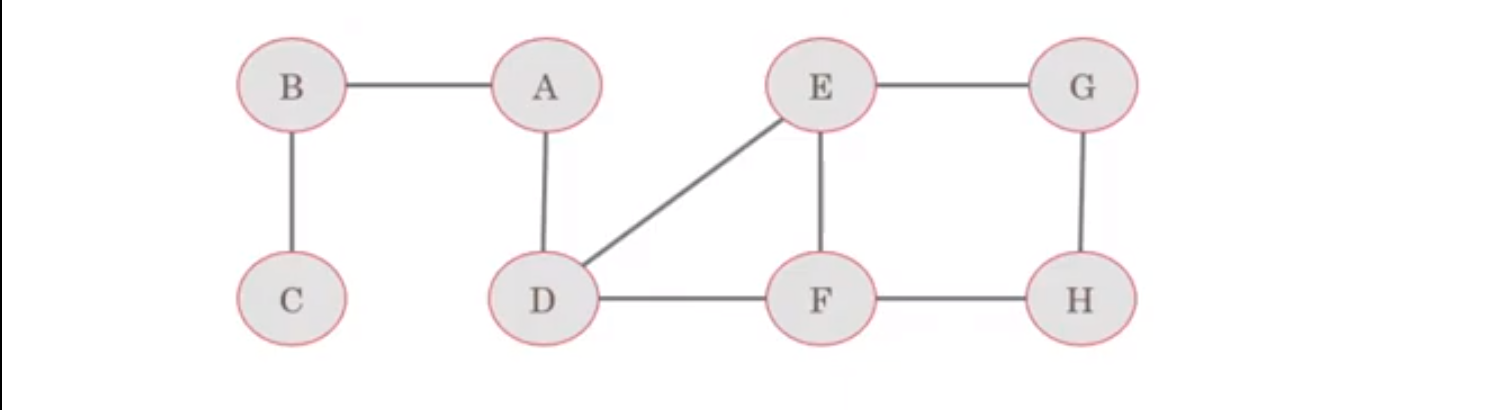

In [1]:
from IPython.core.display import Image,display
from queue import Queue
display(Image(r'C:\Users\Rahul\AppData\Local\Programs\Python\Python38\Scripts\graph.png'))

In [1]:
routes={
    'A':['B','D'],
    'B':['A','C'],
    'C':['B'],
    'D':['A','E','F'],
    'E':['D','F','G'],
    'F':['D','E','H'],
    'G':['E','H'],
    'H':['F','G']
}

In [10]:
queue=Queue()

In [11]:
visited={}
level={}
parent={}
out=[]
for i in routes:
    visited[i]=False
    parent[i]=None
    level[i]=-1
queue.put('A')
visited['A']=True
while not queue.empty():
    u=queue.get()
    out.append(u)
    for i in routes[u]:
        if not visited[i]:
            visited[i]=True
            level[i]=level[u]+1
            parent[i]=u
            queue.put(i)

In [12]:
out

['A', 'B', 'D', 'C', 'E', 'F', 'G', 'H']

# DFS algorithm

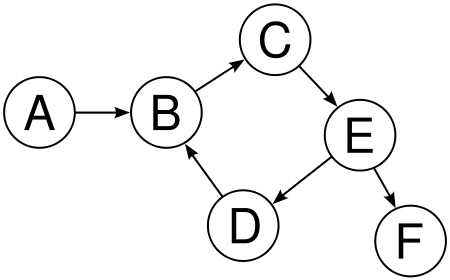

In [4]:
from IPython.core.display import Image,display
from queue import Queue
display(Image(r'C:\Users\Rahul\AppData\Local\Programs\Python\Python38\Scripts\Directed_graph.png'))

In [14]:
color={}
parent={}
out=[]

In [15]:
routes={
    'A':['B'],
    'B':['C'],
    'C':['E'],
    'D':['B'],
    'E':['D','F'],
    'F':[]
}

In [16]:
# White for invisited Grey for nodes visited one time and black whose all connections are visited
for i in routes:
    color[i]='W'
    parent[i]=None
print(color,parent)

{'A': 'W', 'B': 'W', 'C': 'W', 'D': 'W', 'E': 'W', 'F': 'W'} {'A': None, 'B': None, 'C': None, 'D': None, 'E': None, 'F': None}


In [17]:
def DFS(node):
    color[node]='G'
    out.append(node)
    for i in routes[node]:
        if color[i]=='W':
            parent[i]=node
            DFS(i)
    color[node]='B'

In [19]:
DFS('A')

In [20]:
out

['A', 'B', 'C', 'E', 'D', 'F']